In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV
team_activity_file_path = 'data/team_activity.csv'
df = pd.read_csv(team_activity_file_path, index_col=0).transpose()


In [5]:
# Define the mapping from qualitative descriptions to numerical values
involvement_mapping = {
    'Strong': 3,
    'Good': 2,
    'Average': 1,
    'None': 0
}
involvement_columns = ['Funding', 'Application-Oriented', 'Demos', 'Industrial Collaborations', 'System Maturity', 'Number of Members', 'Academic Collaborations']

# Convert qualitative descriptions to numerical values
for column in involvement_columns:
    if column in df.columns:
        df[column] = df[column].map(involvement_mapping).fillna(0)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


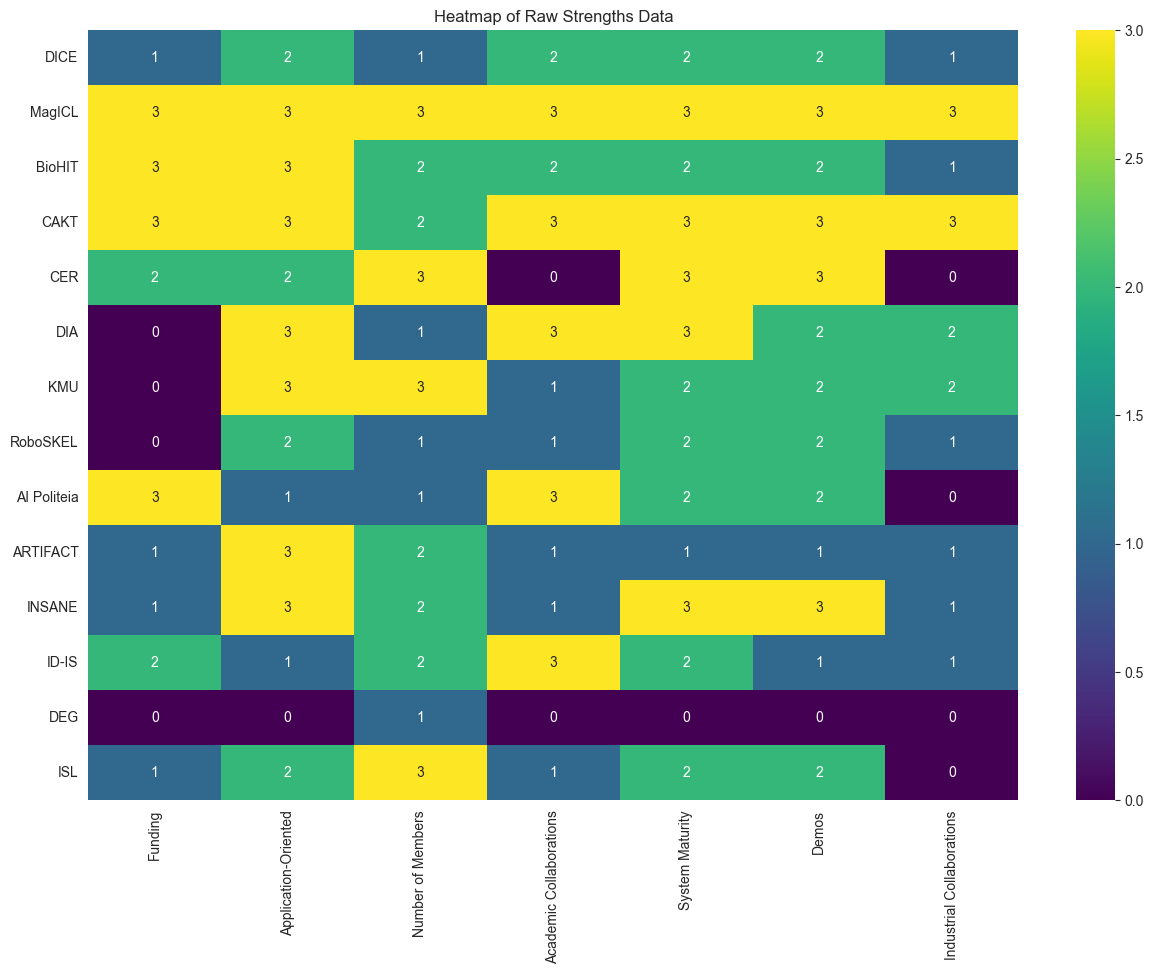

In [11]:
df_scaled = scaler.fit_transform(df)
plt.figure(figsize=(15, 10))
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Heatmap of Raw Strengths Data')
plt.show()

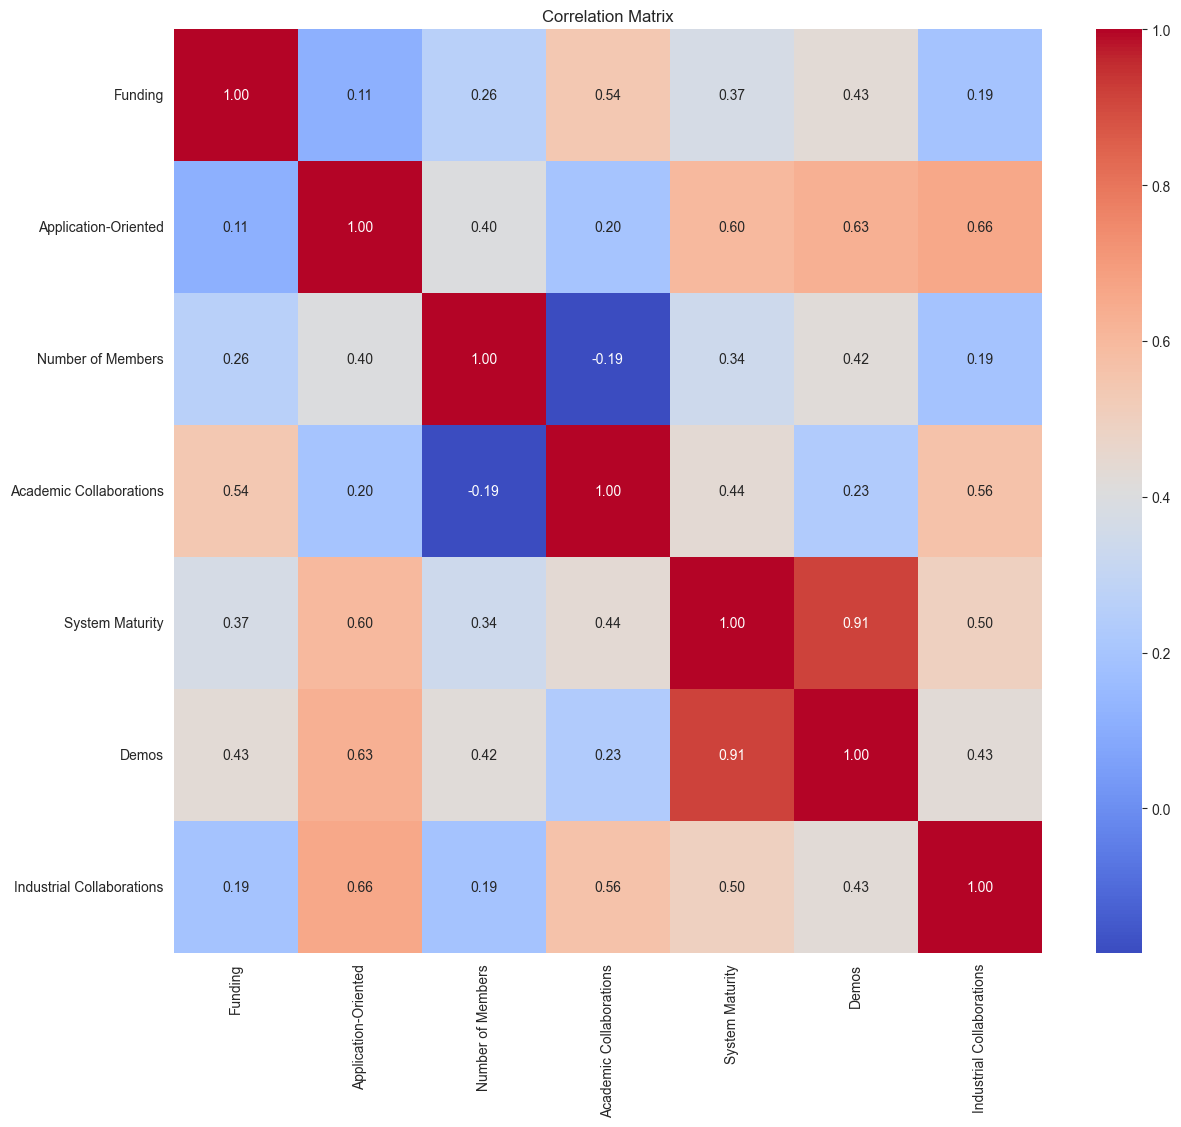

In [12]:
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [15]:
"""
    Applies Factor Analysis to the scaled data to reduce its dimensionality.

    Factor Analysis is a statistical method used to describe variability among observed,
    correlated variables in terms of potentially lower unobserved variables called factors.

    Parameters:
    - X_scaled (ndarray): The scaled data matrix (e.g., result of StandardScaler).
    - n_components (int): Number of factors to extract. Default is 2.
    - random_state (int): Seed used by the random number generator. Default is 42.

    Returns:
    - fa_results (ndarray): The transformed data matrix with reduced dimensions.
    - fa (FactorAnalysis object): The fitted FactorAnalysis model.
    """

# Apply Factor Analysis
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=2, random_state=42)
fa_results = fa.fit_transform(X_scaled)

In [16]:
# Create a DataFrame with the Factor Analysis results
fa_df = pd.DataFrame(data=fa_results, columns=['Factor1', 'Factor2'])
fa_df['Team'] = df.index

In [17]:
# Display the factor loadings
factor_loadings = pd.DataFrame(fa.components_.T, index=df.columns, columns=['Factor1', 'Factor2'])
print(factor_loadings)

                            Factor1   Factor2
Funding                   -0.546355 -0.248861
Application-Oriented      -0.612192  0.204794
Number of Members         -0.288099  0.442011
Academic Collaborations   -0.591636 -0.785128
System Maturity           -0.938720  0.156669
Demos                     -0.906122  0.387385
Industrial Collaborations -0.590910 -0.263268


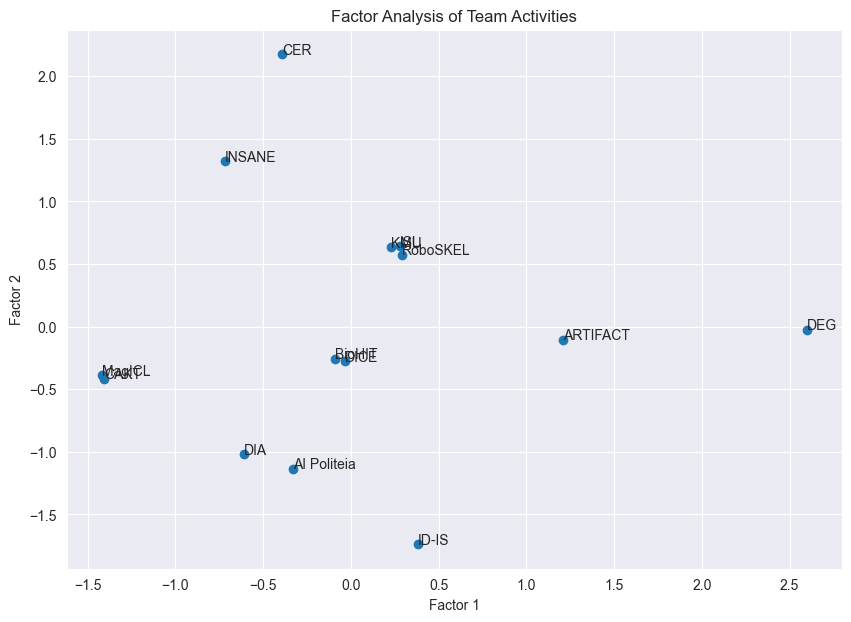

In [18]:
# Plot Factor Analysis results
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(fa_df['Factor1'], fa_df['Factor2'])
for i, txt in enumerate(fa_df['Team']):
    plt.annotate(txt, (fa_df['Factor1'][i], fa_df['Factor2'][i]))
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Analysis of Team Activities')
plt.show()

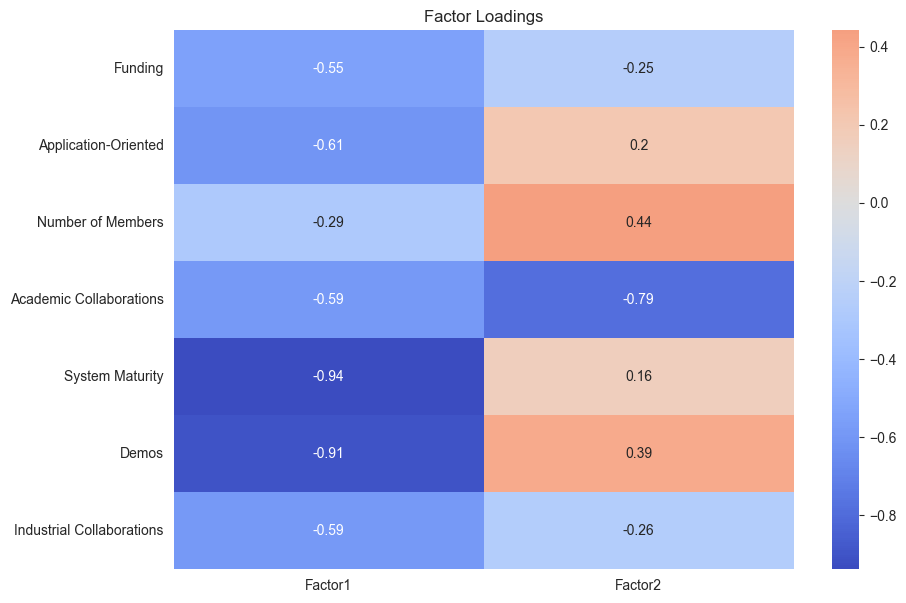

In [19]:
import seaborn as sns

# Plot the factor loadings
plt.figure(figsize=(10, 7))
sns.heatmap(factor_loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Factor Loadings')
plt.show()


In [21]:
feature_weights = {
    'Demos': 1,
    'Industrial Collaborations': 1,
    'Academic Collaborations': 1,
    'Application-Oriented': 1,
    'System Maturity': 1,
    'Funding': 1,
    'Number of Members': 1,
}

In [22]:
# Calculate performance scores based on the mapping and weights
def calculate_performance_score(row, weights):
    
    """
    Calculate a performance score for a given row based on the feature values and their corresponding weights.

    Parameters:
    - row (Series): A row of data from the DataFrame.
    - weights (dict): A dictionary where keys are feature names and values are the weights for those features.

    Returns:
    - score (int): The calculated performance score for the row.
    """
    score = 0
    for feature, weight in weights.items():
        if feature in row:
            score += row[feature] * weight
    return score

df['Performance Score'] = df.apply(calculate_performance_score, axis=1, weights=feature_weights)

# Reset index to have 'Team' as a column
df.reset_index(inplace=True)
df.rename(columns={'index': 'Team'}, inplace=True)

# Display the updated DataFrame
print(df.head())

     Team  Funding  Application-Oriented  Number of Members  \
0    DICE      1.0                   2.0                  1   
1  MagICL      3.0                   3.0                  3   
2  BioHIT      3.0                   3.0                  2   
3    CAKT      3.0                   3.0                  2   
4     CER      2.0                   2.0                  3   

   Academic Collaborations  System Maturity  Demos  Industrial Collaborations  \
0                      2.0              2.0    2.0                        1.0   
1                      3.0              3.0    3.0                        3.0   
2                      2.0              2.0    2.0                        1.0   
3                      3.0              3.0    3.0                        3.0   
4                      0.0              3.0    3.0                        0.0   

   Performance Score  
0               11.0  
1               21.0  
2               15.0  
3               20.0  
4               13.

In [23]:
# Visualize individual team performance
def plot_individual_performance(df):
    
     
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Team', y='Performance Score', hue='Team', data=df, palette='viridis', dodge=False, legend=False)
    plt.title('Team Performance Scores')
    plt.xlabel('Team')
    plt.ylabel('Performance Score')
    plt.xticks(rotation=45)
    plt.show()

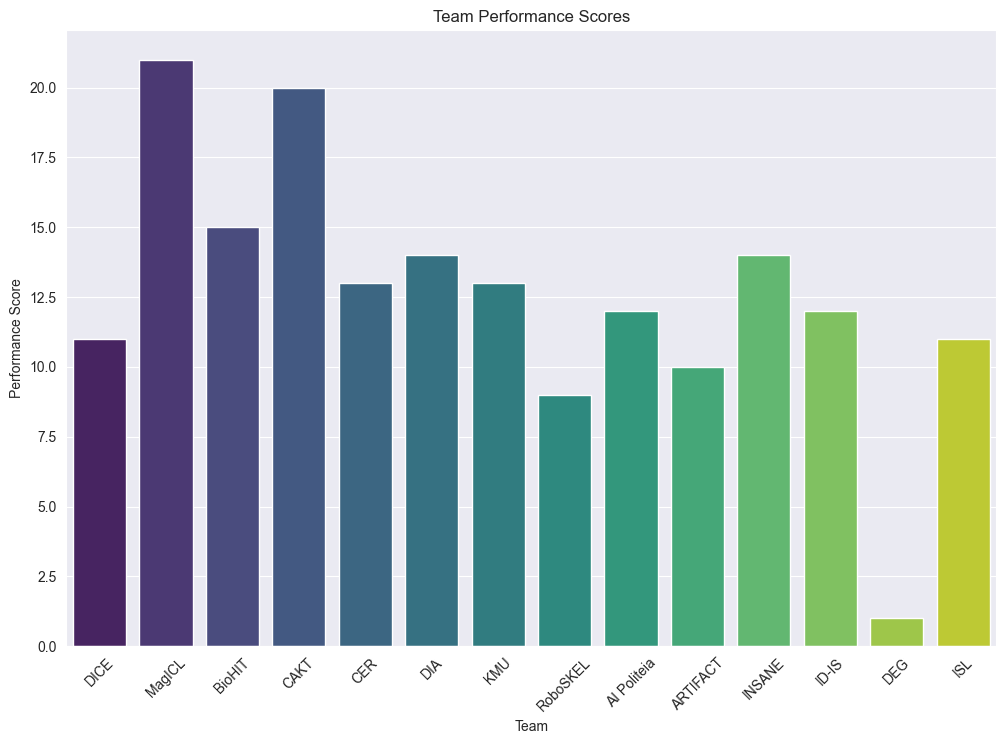

In [24]:
plot_individual_performance(df)

In [25]:
def plot_performance_distribution(df):
    """
    Plots a histogram of performance scores with a kernel density estimate (KDE).

    Parameters:
    - df (DataFrame): The DataFrame containing the team activity data and performance scores.

    Returns:
    - None
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Performance Score'], kde=True, color='blue')
    plt.title('Performance Score Distribution')
    plt.xlabel('Performance Score')
    plt.ylabel('Frequency')
    plt.show()

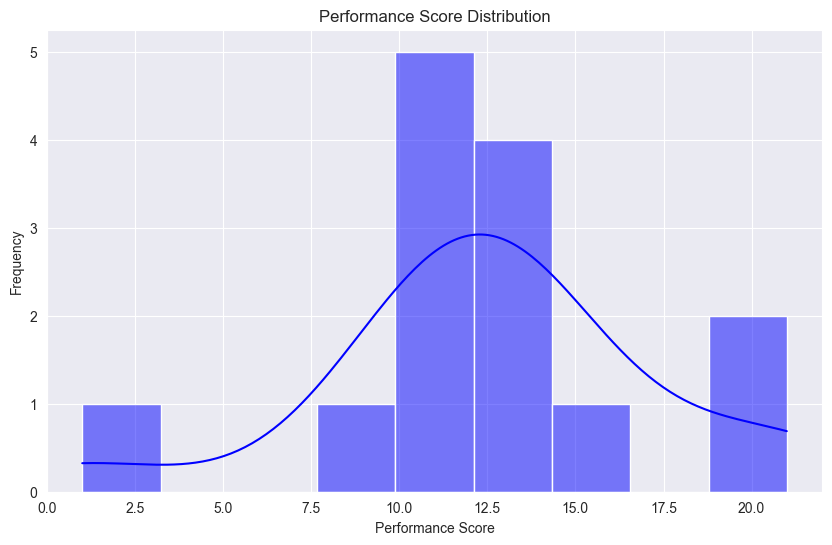

In [26]:
plot_performance_distribution(df)